# Predict the future
After learning about all these classifiers and regressors, we have become optimistic and want to predict the future.
Is it possible???? Let's see

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### user defined evaluation metric
In the above examples we have used accuracy as evaluation metric.
However, other evaluation metrices such as auroc,aupr etc. are available inside sklearn(Those are out 
of the scope of this workshop).

In [36]:
 def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [37]:
# We may want to predict goole stockprice for 22nd October,2017(that will be 10 days into the future)
how_many_days_into_future = 150
number_of_time_steps_to_consider = 20

### let's build the dataset
The whole process may seem complex right now, but don't worry. Just focus on **WHAT** we are doing while ignoring **HOW** we are doing for the time being and you will be good to go.

In [38]:
df = pd.read_csv('google_stock_price.csv',index_col=0)
dataset_to_consider = df['Adj. Close'].values

In [39]:
# Feature Scaling
# This is very very important for many of the ml models to be able to operate properly
# The values may be in different scales initially
# Bring everything between [0,1](atleast that is a good starting point)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_to_consider)

# Creating a data structure with 20 timesteps and t+1 output


X_train = []
y_train = []
for i in range(number_of_time_steps_to_consider, len(dataset_to_consider)-how_many_days_into_future):
    X_train.append(training_set_scaled[i-number_of_time_steps_to_consider:i])
    y_train.append(training_set_scaled[i+how_many_days_into_future])
X, y = np.array(X_train), np.array(y_train)

#trying to encounter the divide by zero in percentage
X = X + 0.01
y = y + 0.01

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [40]:
print('Feature matrix\n',X)
print('Label\n',y)

Feature matrix
 [[ 0.07546081  0.07546081  0.07373816 ...,  0.06828309  0.07373816
   0.0701493 ]
 [ 0.07546081  0.07373816  0.07280505 ...,  0.07373816  0.0701493
   0.07101062]
 [ 0.07373816  0.07280505  0.07373816 ...,  0.0701493   0.07101062
   0.06828309]
 ..., 
 [ 0.79395062  0.78505024  0.79438128 ...,  0.76739305  0.7672495
   0.75863623]
 [ 0.78505024  0.79438128  0.79395062 ...,  0.7672495   0.75863623
   0.75389894]
 [ 0.79438128  0.79395062  0.78332759 ...,  0.75863623  0.75389894
   0.75978467]]
Label
 [ 0.0817772   0.08263853  0.07904967 ...,  0.76796727  0.76897215
  0.77241746]


In [41]:
# We are using RandomForestRegressor here
# this model can be replaced by basically any regression model
regressor = RandomForestRegressor(n_estimators=20)
skf = KFold(n_splits=5,shuffle=True)


all_runs_average_mape = []
# here the model is trained and tested 5 times 

for i in range(0,1) : 

    skf = KFold(n_splits=5,shuffle=True)
    
    all_mape = []
    
    for train_index, test_index in skf.split(X, y):
    
        X_train = X[train_index]
        X_test = X[test_index]
    
        y_train = y[train_index]
        y_test = y[test_index]
    

        regressor.fit(X_train,y_train)
    
        predictions  = regressor.predict(X_test)
        
        all_mape.append(mean_absolute_percentage_error(y_test, predictions))
                

    average_mape = sum(all_mape)/len(all_mape)
    
    all_runs_average_mape.append(average_mape)
    
    

mape_all_runs_average = sum(all_runs_average_mape)/len(all_runs_average_mape)

print('mape\n',mape_all_runs_average)

mape
 48.0347592899


C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


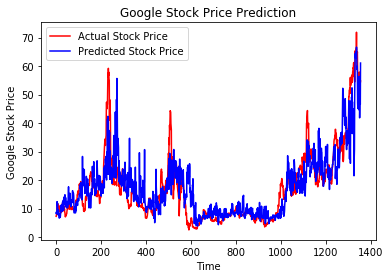

In [42]:
# Visualising the results
plt.plot(sc.inverse_transform(y_test), color = 'red', label = 'Actual Stock Price')
plt.plot(sc.inverse_transform(predictions), color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()